In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Preprocessing

Pipeline: Missing -> transforms -> outliers -> scaling

## Missing Value

In [2]:
import pandas as pd
import numpy as np

In [235]:
# Read data
loan_data = pd.read_json('loan.json',orient='columns')
loan_data.index = range(0,len(loan_data))

### Initial check

In [92]:
# Print missing values
print(loan_data.isna().sum())

Loan Status                       0
Current Loan Amount               0
Term                              0
Credit Score                    120
Years in current job              0
Home Ownership                    0
Annual Income                   120
Purpose                           0
Monthly Debt                      0
Years of Credit History           0
Months since last delinquent    335
Number of Open Accounts           0
Number of Credit Problems         0
Current Credit Balance            0
Maximum Open Credit               0
Bankruptcies                      0
Tax Liens                         0
dtype: int64


In [93]:
# Drop rows with missing values
dropNArows = loan_data.dropna(axis=0)
# Print percentage of rows remaining
print('There are {0:.2f}% rows remained'.format(dropNArows.shape[0]/loan_data.shape[0]*100))

# Drop columns with missing values
dropNAcols = loan_data.dropna(axis=1)
# Print percentage of columns remaining
print('There are {0:.2f}% columns remained'.format(round(dropNAcols.shape[1]/loan_data.shape[1] * 100),2))

There are 34.67% rows remained
There are 82.00% columns remained


### Impute

In [ ]:
# Read data
loan_data = pd.read_json('loan.json',orient='columns')
loan_data.index = range(0,len(loan_data))

In [94]:
import seaborn as sns

#### mean impute

In [95]:
# Import imputer module
from sklearn.impute import SimpleImputer

# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])

# Impute with mean
imp_mean = SimpleImputer(strategy='mean')
loans_imp_mean = imp_mean.fit_transform(numeric_cols)

# Convert returned array to DataFrame
loans_imp_meanDF = pd.DataFrame(loans_imp_mean, columns=numeric_cols.columns)

loans_imp_meanDF.head()

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,99999999.0,728.0,5.0,55303.0,847.97,8.4,37.339623,12.0,0.0,17650.0,27751.0,0.0,0.0
1,99999999.0,709.0,9.0,73188.0,945.35,15.1,37.000000,9.0,1.0,4030.0,9665.0,0.0,0.0
2,99999999.0,731.0,1.0,73175.0,573.20,10.2,37.339623,16.0,1.0,19579.0,37870.0,1.0,0.0
3,99999999.0,729.0,10.0,60552.0,1483.52,18.1,37.339623,14.0,0.0,26919.0,30695.0,0.0,0.0
4,99999999.0,733.0,1.0,75660.0,1298.83,25.0,27.000000,18.0,0.0,19001.0,34928.0,0.0,0.0


#### Iterative impute

In [96]:
### mean impute

In [97]:
# Import imputer module
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])

# Iteratively impute
imp_iter = IterativeImputer(max_iter=5, sample_posterior=True, random_state=123)
loans_imp_iter = imp_iter.fit_transform(numeric_cols)

# Convert returned array to DataFrame
loans_imp_iterDF = pd.DataFrame(loans_imp_iter, columns=numeric_cols.columns)

loans_imp_iterDF.head()

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,99999999.0,728.0,5.0,55303.0,847.97,8.4,10.643782,12.0,0.0,17650.0,27751.0,0.0,0.0
1,99999999.0,709.0,9.0,73188.0,945.35,15.1,37.000000,9.0,1.0,4030.0,9665.0,0.0,0.0
2,99999999.0,731.0,1.0,73175.0,573.20,10.2,57.079196,16.0,1.0,19579.0,37870.0,1.0,0.0
3,99999999.0,729.0,10.0,60552.0,1483.52,18.1,61.316128,14.0,0.0,26919.0,30695.0,0.0,0.0
4,99999999.0,733.0,1.0,75660.0,1298.83,25.0,27.000000,18.0,0.0,19001.0,34928.0,0.0,0.0


## Distribution and Transformation

In [ ]:
# Read data
loan_data = pd.read_json('loan.json',orient='columns')
loan_data.index = range(0,len(loan_data))

### Train and Test Distribution

Training Data Distribution


<Figure size 432x288 with 0 Axes>

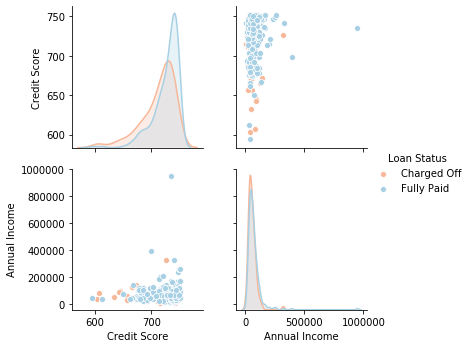

Test Data Distribution


<Figure size 432x288 with 0 Axes>

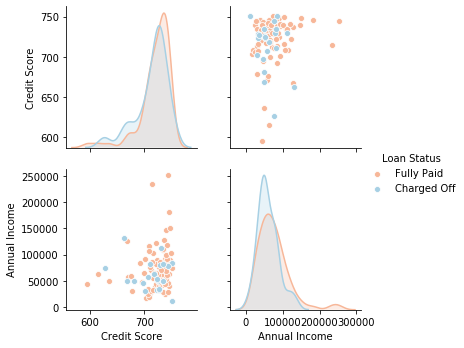

In [101]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Create `loan_data` subset: loan_data_subset
loan_data_subset = loan_data[['Credit Score','Annual Income','Loan Status']]

# Create train and test sets
trainingSet, testSet = train_test_split(loan_data_subset,test_size=0.2, random_state=123)

# Examine pairplots
print("Training Data Distribution")
plt.figure()
sns.pairplot(trainingSet, hue='Loan Status', palette='RdBu')
plt.show()

print("Test Data Distribution")
plt.figure()
sns.pairplot(testSet, hue='Loan Status', palette='RdBu')
plt.show()

### Transformation, power and log

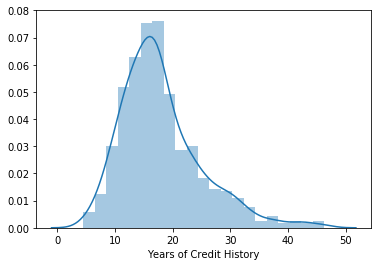

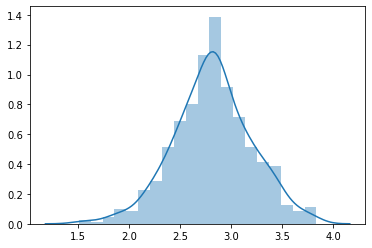

In [104]:
from scipy import stats
# Subset loan_data
cr_yrs = loan_data['Years of Credit History']

# Histogram and kernel density estimate
plt.figure()### Train and Test Distribution
sns.distplot(cr_yrs,kde = True)
plt.show()

# Box-Cox transformation
cr_yrs_log = stats.boxcox(cr_yrs, lmbda=0)   # lmbda = exponent. 0 stands for log
# Histogram and kernel density estimate
plt.figure()
sns.distplot(cr_yrs_log)
plt.show()

## Outlier and scaling

In [ ]:
# Read data
loan_data = pd.read_json('loan.json',orient='columns')
loan_data.index = range(0,len(loan_data))

### Check outliers with boxplot

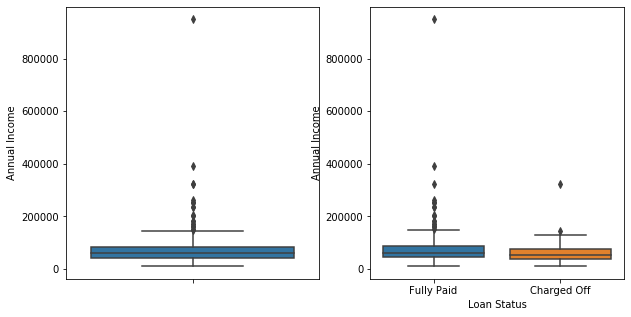

In [116]:
# Univariate and multivariate boxplots
fig = plt.figure(figsize=(10,5))
ax = fig.subplots(1,2)

#fig, ax = plt.subplots(1,2,figsize=(10,5))  
sns.boxplot(y=loan_data['Annual Income'], ax=ax[0])
sns.boxplot(x='Loan Status', y='Annual Income', data=loan_data, ax=ax[1])
plt.show()

### Deal with outliers

In [146]:
from scipy.stats import mstats

**I. Drop outliers**

In [179]:
numeric_cols = loan_data.select_dtypes(include=[np.number])
categoric_cols = loan_data.select_dtypes(include=object)

In [126]:
# Print: before dropping
'''
print(numeric_cols.mean())
print(numeric_cols.median())
print(numeric_cols.max())
'''

'\nprint(numeric_cols.mean())\nprint(numeric_cols.median())\nprint(numeric_cols.max())\n'

In [128]:
# Create index of rows to keep
idx = (np.abs(stats.zscore(numeric_cols)) < 3).all(axis=1)

# Concatenate numeric and categoric subsets
ld_out_drop = pd.concat([numeric_cols.loc[idx], categoric_cols.loc[idx]], axis=1)

/Users/JoeCheung/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


**II. Replace with Winsorize**  
<https://www.zhihu.com/question/25558224/answer/315346401>

In [167]:
# Print: before winsorize
print('Before handling outliers');print((loan_data['Monthly Debt']).mean());print((loan_data['Monthly Debt']).median());print((loan_data['Monthly Debt']).max())

# Winsorize numeric columns
debt_win = mstats.winsorize(loan_data['Monthly Debt'], limits=[0.05, 0.05])

# Convert to DataFrame, reassign column name
debt_out = pd.DataFrame(debt_win, columns=['Monthly Debt'])

# Pri**I. Drop outliers**nt: after winsorize
print('After handling outliers');print((debt_out['Monthly Debt']).mean());print((debt_out['Monthly Debt']).median());print((debt_out['Monthly Debt']).max())


Before handling outliers
952.4355833333343
840.855
5778.5
After handling outliers
925.0406166666676
840.855
2051.51


**III. Replace with median**

In [168]:
# Print: before replace with median
print('Before handling outliers');print((loan_data['Monthly Debt']).mean());print((loan_data['Monthly Debt']).median());print((loan_data['Monthly Debt']).max())

# Find median**I. Drop outliers**
median = loan_data.loc[loan_data['Monthly Debt'] < 2120, 'Monthly Debt'].median()

# Replace outliers with median on data smaller than 2120, reassign column name
debt_win = np.where(loan_data['Monthly Debt'] > 2120, median, loan_data['Monthly Debt'])
debt_out = pd.DataFrame(debt_win, columns=['Monthly Debt'])

print('After handling outliers');print((debt_out['Monthly Debt']).mean());print((debt_out['Monthly Debt']).median());print((debt_out['Monthly Debt']).max())


Before handling outliers
952.4355833333343
840.855
5778.5
After handling outliers
871.4864666666673
809.96
2116.66


### Scaling

Standardize: Z-score,(x-miu)/sigma  
Normalize: (x-xmin)/(xmax-xmin)

In [180]:
from sklearn.preprocessing import StandardScaler
# Instantiate
scaler = StandardScaler()

# Fit and transform, convert to DF
numeric_cols_scaled = scaler.fit_transform(numeric_cols)
numeric_cols_scaledDF = pd.DataFrame(numeric_cols_scaled, columns=numeric_cols.columns)

# Concatenate categoric columns to scaled numeric columns
final_DF = pd.concat([numeric_cols_scaledDF, categoric_cols], axis=1)

final_DF.head()

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,DTI Ratio,Loan Status,Term,Home Ownership,Purpose
0,0.396557,0.369586,-1.301860,-0.492137,-0.307620,0.160705,-1.134338,0.142037,-0.345358,-0.456232,-0.470380,-0.33297,-0.121988,0.273217,Charged Off,Short Term,Rent,DebtConsolidation
1,1.703518,0.540851,1.188561,0.239802,-0.125740,1.180934,-1.909600,0.533743,-0.345358,1.046150,1.022906,-0.33297,-0.121988,-0.570133,Charged Off,Long Term,Mortgage,DebtConsolidation
2,1.174271,-0.555245,0.081707,0.202691,0.125730,-0.440969,-1.313486,0.337890,-0.345358,0.011860,-0.159737,-0.33297,-0.121988,-0.235273,Charged Off,Long Term,Mortgage,DebtConsolidation
3,-0.517866,-0.897775,-1.301860,0.093206,-1.041469,0.265344,0.119696,-1.620639,-0.345358,-0.532483,-0.498576,-0.33297,-0.121988,-1.579671,Charged Off,Short Term,Rent,DebtConsolidation
4,-0.196392,-0.829269,1.188561,0.212038,0.937076,1.599489,-1.358273,1.317154,-0.345358,0.971041,0.523637,-0.33297,-0.121988,0.709774,Charged Off,Long Term,Mortgage,Other


# Supervised Learning

In [211]:
# Read data
diabetes = pd.read_json('diabetes.json')
diabetes = diabetes.reindex(range(0,len(diabetes)))
X = diabetes.drop(['progression'],axis=1)
y = diabetes['progression']

## Feature selection

1. Filter: Rank features based on statistical performance
2. Wrapper: Use an ML method to evaluate performance
3. Embedded: Iterative model training to extract features
4. Feature importance: tree-based ML models

**I. Filter: Rank features based on statistical performance (statistical value)**

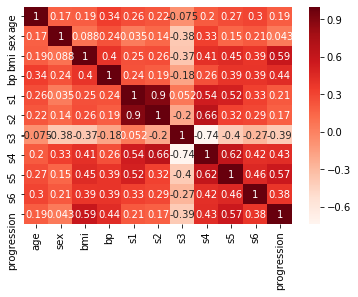

bmi            0.586450
s5             0.565883
progression    1.000000
Name: progression, dtype: float64


In [186]:
# Create correlation matrix and print it
cor = diabetes.corr()

# Correlation matrix heatmap
plt.figure();sns.heatmap(cor, annot=True, cmap=plt.cm.Reds);plt.show()

# Correlation with output variable
cor_target = abs(cor["progression"])

# Selecting highly correlated features: correlation lager than 5
best_features = cor_target[cor_target > 0.5]
print(best_features)

**II. Wrapper: Use an ML method to evaluate performance (stepwise)**

In [225]:
# Import modules
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV

# Instantiate estimator and feature selector
svr_mod = SVR(kernel="linear")
feat_selector = RFECV(svr_mod, cv=5)

# Fit
feat_selector = feat_selector.fit(X, y)

# Print support and ranking
pd.DataFrame({'Support':feat_selector.support_,'Ranking':feat_selector.ranking_},index=X.columns)

,Support,Ranking
age,True,1
sex,False,2
bmi,True,1
bp,True,1
s1,True,1
s2,True,1
s3,True,1
s4,True,1
s5,True,1
s6,True,1


**III. Embedded: Iterative model training to extract features (regularization)**

In [230]:
# Import modules
from sklearn.linear_model import LarsCV

# Instantiate
lars_mod = LarsCV(cv=5, normalize=False)   # lasso regression

# Fit
feat_selector = lars_mod.fit(X, y)

# Print r-squared score and estimated alpha
print(lars_mod.score(X, y)) 
print(lars_mod.alpha_)   # alpha is the penalizer, alpha=1/C=lambda
pd.DataFrame(lars_mod.coef_,index=X.columns,columns=['Coefficient'])

0.5000547925372048
0.16078158452691257


,Coefficient
age,0.000000
sex,-108.050698
bmi,511.970325
bp,250.579899
s1,0.000000
s2,0.000000
s3,-193.254546
s4,0.000000
s5,452.209882
s6,10.798103


**IV. Feature importance: tree-based ML models**

In [229]:
# Import
from sklearn.ensemble import RandomForestRegressor

# Instantiate
rf_mod = RandomForestRegressor(max_depth=2, random_state=123, 
              n_estimators=100, oob_score=True)

# Fit
rf_mod.fit(X, y)

# Print
pd.DataFrame(rf_mod.feature_importances_,index=X.columns,columns=['Importance'])

,importance
age,0.000000
sex,0.000000
bmi,0.399616
bp,0.030856
s1,0.000000
s2,0.001289
s3,0.007003
s4,0.004179
s5,0.538995
s6,0.018062


## Regularization

In [ ]:
# Read data
diabetes = pd.read_json('diabetes.json')
diabetes = diabetes.reindex(range(0,len(diabetes)))
X = diabetes.drop(['progression'],axis=1)
y = diabetes['progression']

**I. Lasso regression**

In [232]:
# Import modules
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)

# Instantiate cross-validated lasso, find best alpha
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)
lasso_cv.fit(X_train, y_train)

# Instantiate lasso, using best alpha to fit, predict and print MSE
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)
print("MSE:",mean_squared_error(y_true=y_test, y_pred=lasso.predict(X_test)))

MSE: 2924.585983509452


**II. Ridge regression**

In [262]:
# Import modules
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)

# Instantiate cross-validated ridge, fit
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge_cv.fit(X_train, y_train)

# Instantiate ridge, fit, predict and print MSE
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)
print("MSE: {0:.2f}".format(mean_squared_error(y_true=y_test, y_pred=ridge.predict(X_test))))

MSE: 0.19


## Classification

In [350]:
# Read data
loan_data = pd.read_json('loan.json',orient='columns')
loan_data.index = range(0,len(loan_data))

### Feature Engineering

In [351]:
# Convert income: monthly_income
monthly_income = loan_data["Annual Income"]/12

# Make engineered feature, remove features used
loan_data["dti_ratio"] = loan_data["Monthly Debt"]/monthly_income * 100
loan_data = loan_data.drop(["Monthly Debt","Annual Income"], axis=1)

# Replace target variable levels
loan_data["Loan Status"] = loan_data["Loan Status"].replace({'Fully Paid': 0, 'Charged Off': 1})

# One-hot encode categorical variables
loan_data = pd.get_dummies(data=loan_data)

# Create X matrix and y array
X = loan_data.drop("Loan Status", axis=1)
y = loan_data["Loan Status"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Instantiate
logistic_dti = LogisticRegression()

# Fit
logistic_dti.fit(X_train, y_train)

# Predict and print accuracy
print("Accuracy: {0:.2f}".format(accuracy_score(y_true=y_test, y_pred=logistic_dti.predict(X_test))))

Accuracy: 0.72


/Users/JoeCheung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Ensemble methods

1. Bagging: Bootstrap Aggregation
2. Boosting
3. Stacking: Pay attention to the split of data in stacking <https://baijiahao.baidu.com/s?id=1633580172255481867&wfr=spider&for=pc>

In [261]:
from sklearn.ensemble import BaggingClassifier,XGBClassifier

# Instantiate bootstrap aggregation model
bagged_model = BaggingClassifier(n_estimators=50, random_state=123)

# Fit
bagged_model.fit(X_train, y_train)

# Predict
bagged_pred = bagged_model.predict(X_test)

print("Accuracy: {0:.2f}".format(accuracy_score(y_test, bagged_pred)))

Accuracy: 0.72


# Unsupervised Learning

## Dimension reduction

### PCA

**Example: Loan data**

In [316]:
loans = pd.read_json('loan.json',orient='columns')
loans.index = range(0,len(loans))
loans = loans.sample(900)
X = loans.select_dtypes(include=[np.number])

In [317]:
# Import module
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=2)

# Fit and transform
principalComponents = pca.fit_transform(X)

# Print ratio of variance explained
print(pca.explained_variance_ratio_)

# transformed PC = principalComponents

[0.70739168 0.25930625]


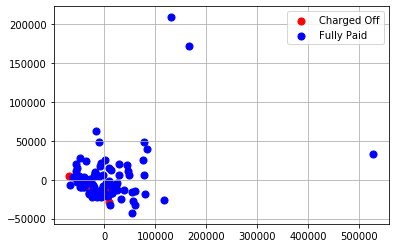

In [319]:
# This visualize the result of PCA

# transform PCA array to DataFrame
principalComponents_df = pd.DataFrame(principalComponents,columns=["PC1","PC2"])
principalComponents_df['target'] = loans['Loan Status']

# create list of targets and corresponding color
targets = ['Charged Off', 'Fully Paid']
colors = ['r', 'b']

# For loop to create plot
for target, color in zip(targets,colors):
    indicesToKeep = principalComponents_df['target'] == target
    plt.scatter(principalComponents_df.loc[indicesToKeep, 'PC1']
               , principalComponents_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)

# Legend    
plt.legend(targets)
plt.grid()
plt.show()

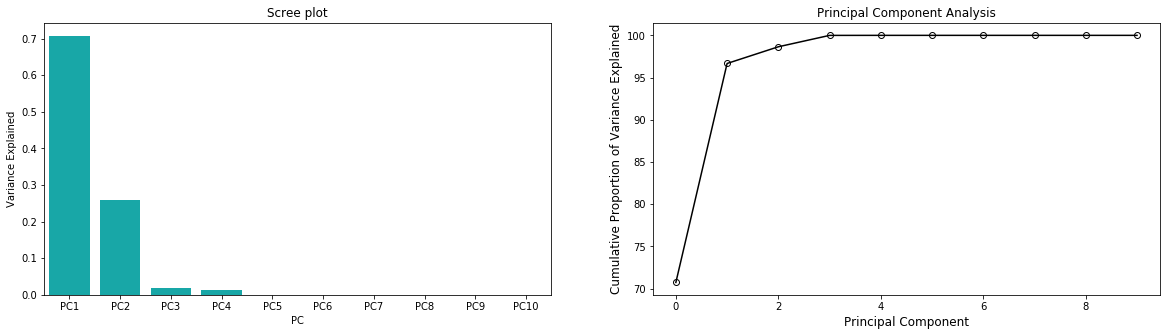

In [326]:
# This creates PCA Scree plot
X = loans.select_dtypes(include=[np.number])

# Instantiate
pca = PCA(n_components=10)

# Fit and transform
principalComponents = pca.fit_transform(X)
var = pca.explained_variance_ratio_

# List principal components names
colname = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

# Create a DataFrame
pca_df = pd.DataFrame({'Variance Explained': var,
             'PC':colname})

# Scree plot
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(x='PC',y='Variance Explained', 
           data=pca_df, color="c")
plt.title('Scree plot',fontsize=12)

# Plot cumulative variance
plt.subplot(1,2,2)
cumulative_var = np.cumsum(var)*100
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)
plt.show()

### SVD

**Example: Diabetes data**

In [ ]:
# Read data
diabetes = pd.read_json('diabetes.json')
diabetes = diabetes.reindex(range(0,len(diabetes)))
X = diabetes.drop(['progression'],axis=1)
y = diabetes['progression']

In [272]:
# Import module
from sklearn.decomposition import TruncatedSVD

# Feature matrix and target array
X = diabetes.drop('progression', axis=1)
y = diabetes['progression']

# SVD
svd = TruncatedSVD(n_components=3)

# Fit and transform
principalComponents = svd.fit_transform(X)

# Print ratio of variance explained
print(svd.explained_variance_ratio_)

# transformed PC = principalComponents

[0.40242142 0.14923182 0.12059623]


### t-SNE

In [ ]:
# Read data
loans = pd.read_json('loan.json',orient='columns')
loans.index = range(0,len(loans))
loans = loans[0:300]
X = loans.select_dtypes(include=[np.number])

In [287]:
from sklearn.manifold import TSNE 
import seaborn as sns

tsne = TSNE(n_components=2, verbose=0, perplexity=40)

tsne_results = tsne.fit_transform(X) 

loans['t-SNE-PC-one'] = tsne_results[:,0]
loans['t-SNE-PC-two'] = tsne_results[:,1]

# transformed PC = tsne_results

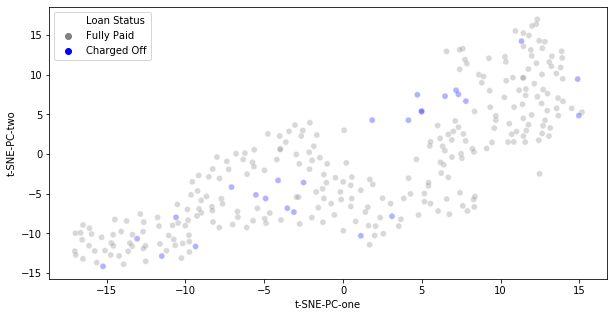

In [286]:
plt.figure(figsize=(10,5)) 
sns.scatterplot(
    x="t-SNE-PC-one", y="t-SNE-PC-two", hue="Loan Status", 
    palette=sns.color_palette(["grey","blue"]), data=loans,
    legend="full",alpha=0.3)

## Clustering

### Algorithms

**I. K-means**

In [ ]:
# Read data
diabetes = pd.read_json('diabetes.json')
diabetes = diabetes.reindex(range(0,len(diabetes)))
X = diabetes.drop(['progression'],axis=1)

In [342]:
# Import module
from sklearn.cluster import KMeans

# Instantiate
kmeans = KMeans(n_clusters=2, random_state=123)

# Fit
kmeans.fit(X)

# Print inertia
print("Sum of squared distances for 2 clusters is", kmeans.inertia_)   # SS distances of observations to closest cluster center

out = X.copy()
out['label'] = kmeans.labels_

out.head(5)

Sum of squared distances for 2 clusters is 7.18700001759521


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,label
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,1
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,1


**II. Hierarchical**

In [ ]:
# Read data
diabetes = pd.read_json('diabetes.json')
diabetes = diabetes.reindex(range(0,len(diabetes)))
X = diabetes.drop(['progression'],axis=1)

In [339]:
# Import module
from sklearn.cluster import AgglomerativeClustering

# Instantiate
hierachical = AgglomerativeClustering(n_clusters=2, linkage = "complete")   # {“ward”, “complete”, “average”, “single”}, default=”ward”

# Fit
hierachical.fit(X)

# Output
out = X.copy()
out['label'] = hierachical.labels_

out.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,label
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,0


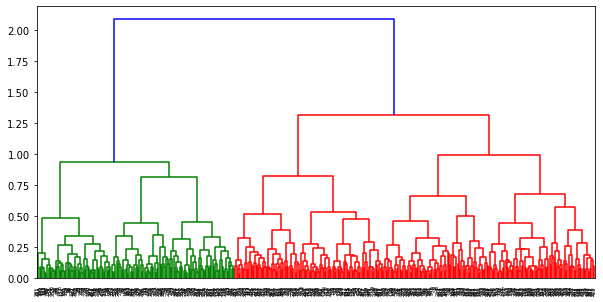

In [345]:
import scipy.cluster.hierarchy as sch

# fit with sch
fit = sch.linkage(X, method='ward')

# Create dendrogram
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(fit)
plt.show()

### Number of clusters

**I. Silhouette Score**

Silhouette Plot:<https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html>

In [ ]:
# Read data
diabetes = pd.read_json('diabetes.json')
diabetes = diabetes.reindex(range(0,len(diabetes)))
X = diabetes.drop(['progression'],axis=1)

In [347]:
# Import modules
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# For loop
for n_clusters in range(2,6):
    kmeans = KMeans(n_clusters=n_clusters)
    # Fit and predict your k-Means object
    preds = kmeans.fit_predict(X)
    score = silhouette_score(X, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {:.2f})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.24)
For n_clusters = 3, silhouette score is 0.15)
For n_clusters = 4, silhouette score is 0.14)
For n_clusters = 5, silhouette score is 0.14)


**II. Elbow Method**

In [ ]:
# Read data
diabetes = pd.read_json('diabetes.json')
diabetes = diabetes.reindex(range(0,len(diabetes)))
X = diabetes.drop(['progression'],axis=1)

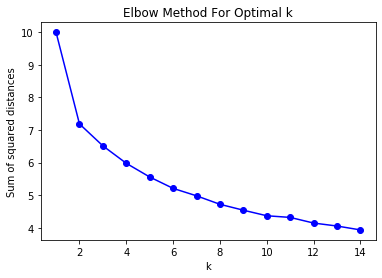

In [349]:
# Create empty list
sum_of_squared_distances = []

# Create for loop
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot
plt.plot(range(1,15), sum_of_squared_distances, 'bo-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Model Selection

## Generalize

### Grid Search

In [365]:
# Read data
loan_data = pd.read_csv('loan_cleaned.csv')
X = loan_data.drop('Loan Status',axis=1)
y = loan_data['Loan Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)

In [368]:
# Import modules
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Create the hyperparameter grid
param_grid = {"criterion": ["gini"], "min_samples_split": [2, 10, 20], 
              "max_depth": [None, 2, 5, 10]}

# Instantiate classifier and GridSearchCV, fit
loans_clf = DecisionTreeClassifier()
dtree_cv = GridSearchCV(loans_clf, param_grid, cv=5)
fit = dtree_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Decision Tree Parameter: {}".format(dtree_cv.best_params_))
print("Tuned Decision Tree Accuracy: {}".format(dtree_cv.best_score_))

Tuned Decision Tree Parameter: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Tuned Decision Tree Accuracy: 0.7215873015873016


### Bootstrap (e.g. Random Forest)

In [371]:
# Import modules
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create the hyperparameter grid
param_grid = {"criterion": ["gini"], "min_samples_split": [2, 10, 20], 
              "max_depth": [None, 2, 5, 10],"max_features": [10, 20, 30]}

# Instantiate classifier and GridSearchCV, fit
loans_rf = RandomForestClassifier()
rf_cv = GridSearchCV(loans_rf,param_grid,cv=5)
fit = rf_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Random Forest Parameter: {}".format(rf_cv.best_params_))
print("Tuned Random Forest Accuracy: {}".format(rf_cv.best_score_))

/Users/JoeCheung/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/JoeCheung/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/JoeCheung/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/JoeCheung/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/JoeCheung/anaconda3/l

/Users/JoeCheung/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/JoeCheung/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/JoeCheung/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/JoeCheung/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/JoeCheung/anaconda3/l

/Users/JoeCheung/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/JoeCheung/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/JoeCheung/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/JoeCheung/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/JoeCheung/anaconda3/l

/Users/JoeCheung/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/JoeCheung/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/JoeCheung/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/JoeCheung/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/JoeCheung/anaconda3/l

/Users/JoeCheung/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/JoeCheung/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/JoeCheung/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/JoeCheung/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/JoeCheung/anaconda3/l

/Users/JoeCheung/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/JoeCheung/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/JoeCheung/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/JoeCheung/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/JoeCheung/anaconda3/l

Tuned Random Forest Parameter: {'criterion': 'gini', 'max_depth': 5, 'max_features': 10, 'min_samples_split': 10}
Tuned Random Forest Accuracy: 0.7276190476190476


## Imbalanced Data

In [372]:
# Read data
loan_data = pd.read_csv('loan_cleaned.csv')
X = loan_data.drop('Loan Status',axis=1)
y = loan_data['Loan Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)

### Metrics

In [383]:
# Import
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Instantiate, fit, predict
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Print evaluation metrics
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, y_pred)))
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("Recall: {}".format(recall_score(y_test, y_pred)))
print("F1: {}".format(f1_score(y_test, y_pred)))

Confusion matrix:
 [[1881   72]
 [ 685   62]]
Accuracy: 0.7196296296296296
Precision: 0.4626865671641791
Recall: 0.08299866131191433
F1: 0.14074914869466515


### Upsampling & Downsampling (Demo)

In [378]:
from sklearn.utils import resample

In [ ]:
# Read data
loan_data = pd.read_csv('loan_cleaned.csv')
X = loan_data.drop('Loan Status',axis=1)
y = loan_data['Loan Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)

In [375]:
approve = loan_data.sample(6000)   # stand for the majority class
deny = loan_data.sample(3000)   # stand for the minority class

In [379]:
# Upsample minority and combine with majority
loans_upsampled = resample(deny, replace=True, n_samples=len(approve), random_state=123)
upsampled = pd.concat([approve, loans_upsampled])

# Downsample majority and combine with minority
loans_downsampled = resample(approve, replace = False,  n_samples = len(deny), random_state = 123)
downsampled = pd.concat([loans_downsampled, deny])

In [384]:
# Upsample
# Upsampled feature matrix and target array
X_train_up = upsampled.drop('Loan Status', axis=1)
y_train_up = upsampled['Loan Status']

# Instantiate, fit, predict
loan_lr_up = LogisticRegression(solver='liblinear')
loan_lr_up.fit(X_train_up, y_train_up)
upsampled_y_pred = loan_lr_up.predict(X_test)

# Print evaluation metrics
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, upsampled_y_pred)))

Confusion matrix:
 [[1883   70]
 [ 693   54]]


In [385]:
# Downsample
# Downsampled feature matrix and target array
X_train_down = downsampled.drop('Loan Status', axis=1)
y_train_down = downsampled['Loan Status']

# Instantiate, fit, predict
loan_lr_down = LogisticRegression(solver='liblinear')
loan_lr_down.fit(X_train_down, y_train_down)
downsampled_y_pred = loan_lr_down.predict(X_test)

# Print evaluation metrics
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, downsampled_y_pred)))

Confusion matrix:
 [[1887   66]
 [ 695   52]]


## Multicollinearity

**Criteria:**
1. VIF
2. Correlation Matrix(heatmap)   

**Solution:**
1. Feature Engineering: Combine multicolliear features
2. PCA
3. Lasso/Ridge
4. Manually Remove

In [15]:
# Read data
loan_data = pd.read_json('loan.json',orient='columns')
loan_data.index = range(0,len(loan_data))
loan_data = loan_data.select_dtypes(include=[np.number])

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["Features"] = loan_data.columns
vif["VIF Factor"] = [variance_inflation_factor(loan_data.values, i) for i in range(loan_data.shape[1])]

vif.head()

,Features,VIF Factor
0,Current Loan Amount,3.158064
1,Credit Score,61.248647
2,Years in current job,3.761628
3,Annual Income,4.822562
4,Monthly Debt,6.529489
